In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load dataset
df = pd.read_csv(r"C:\BE books\Sem1\ML practical\sales_data_sample.csv", encoding='unicode_escape')


In [3]:
# Select numerical features for clustering
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
data = df[features]

# Handle missing values if any
data = data.dropna()

In [4]:
# Normalize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Use the elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)  

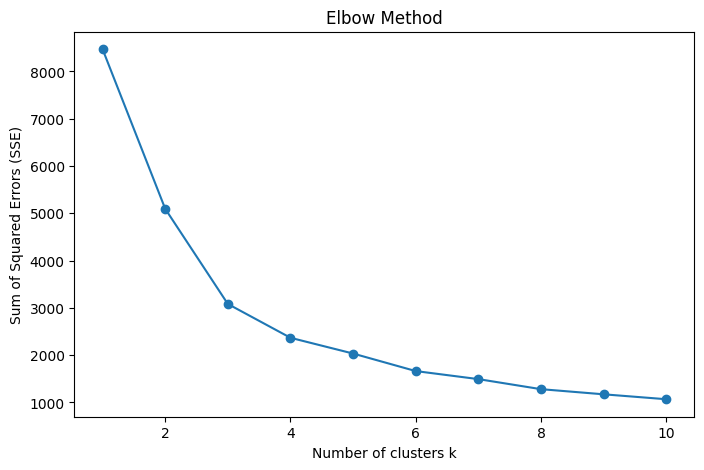

In [5]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [6]:
optimal_k = 4

# Fit KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
kmeans.fit(data_scaled)

# Add cluster labels to original data
df['Cluster'] = kmeans.labels_

# Show sample data with assigned cluster
print(df[features + ['Cluster']].head())

   QUANTITYORDERED  PRICEEACH    SALES  Cluster
0               30      95.70  2871.00        0
1               34      81.35  2765.90        0
2               41      94.74  3884.34        2
3               45      83.26  3746.70        3
4               49     100.00  5205.27        2
